<a href="https://colab.research.google.com/github/Dhiooonn/Data-Mining/blob/main/Preprocessing-Data-Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Preparation Environment
!pip install pandas numpy scikit-learn matplotlib seaborn

In [ ]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [ ]:
# langsung download dari sumber UCI:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/diabetes/diabetes-data.tar.Z

--2025-10-07 02:16:20--  https://archive.ics.uci.edu/ml/machine-learning-databases/diabetes/diabetes-data.tar.Z
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘diabetes-data.tar.Z.2’

diabetes-data.tar.Z     [      <=>           ] 183.16K   129KB/s    in 1.4s    

2025-10-07 02:16:22 (129 KB/s) - ‘diabetes-data.tar.Z.2’ saved [187551]



In [ ]:
# File masih terkompres .tar.Z, jadi perlu di ekstrak
!tar -xvf diabetes-data.tar.Z

# Ekstrak file .tar
!tar -xvf diabetes-data.tar

# Cek apakah file data-* sudah ada
!ls -l | grep data-

tar (child): cannot run compress: No such file or directory
tar (child): trying gzip
Diabetes-Data/
Diabetes-Data/data-01
Diabetes-Data/data-02
Diabetes-Data/data-03
Diabetes-Data/data-04
Diabetes-Data/data-05
Diabetes-Data/data-06
Diabetes-Data/data-07
Diabetes-Data/data-08
Diabetes-Data/data-09
Diabetes-Data/data-10
Diabetes-Data/data-11
Diabetes-Data/data-12
Diabetes-Data/data-13
Diabetes-Data/data-14
Diabetes-Data/data-15
Diabetes-Data/data-16
Diabetes-Data/data-17
Diabetes-Data/data-18
Diabetes-Data/data-19
Diabetes-Data/data-20
Diabetes-Data/data-21
Diabetes-Data/data-22
Diabetes-Data/data-23
Diabetes-Data/data-24
Diabetes-Data/data-25
Diabetes-Data/data-26
Diabetes-Data/data-27
Diabetes-Data/data-28
Diabetes-Data/data-29
Diabetes-Data/data-30
Diabetes-Data/data-31
Diabetes-Data/data-32
Diabetes-Data/data-33
Diabetes-Data/data-34
Diabetes-Data/data-35
Diabetes-Data/data-36
Diabetes-Data/data-37
Diabetes-Data/data-38
Diabetes-Data/data-39
Diabetes-Data/data-40
Diabetes-Data/data-4

In [ ]:
# Gabungkan Semua File Jadi Satu CSV
import glob

# Ambil semua file di folder Diabetes-Data
files = sorted(glob.glob("Diabetes-Data/data-*"))
print("Jumlah file ditemukan:", len(files))  # Harusnya 70

# Gabungkan semua file jadi satu DataFrame
df = pd.concat([
    pd.read_csv(f, delimiter='\t', header=None, names=['Date', 'Time', 'Code', 'Value'])
    for f in files
], ignore_index=True)

# Lihat beberapa baris pertama
df.head()


Jumlah file ditemukan: 70


,Date,Time,Code,Value
0,04-21-1991,9:09,58,100
1,04-21-1991,9:09,33,9
2,04-21-1991,9:09,34,13
3,04-21-1991,17:08,62,119
4,04-21-1991,17:08,33,7


In [ ]:
# Simpan jadi satu file CSV
df.to_csv("diabetes_data.csv", index=False)

In [ ]:
# Menambahkan Header Column
df.columns = ['Date', 'Time', 'Code', 'Value']
df.head()

,Date,Time,Code,Value
0,04-21-1991,9:09,58,100
1,04-21-1991,9:09,33,9
2,04-21-1991,9:09,34,13
3,04-21-1991,17:08,62,119
4,04-21-1991,17:08,33,7


Sesuai dokumentasi UCI, dataset terdiri dari:
*   **Date**
*   **Time**
*   **Code** (kode aktivitas, pengukuran, atau injeksi)
*   **Value** (nilai terkait kode)




In [ ]:
# Cek Informasi Awal
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29330 entries, 0 to 29329
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    29297 non-null  object
 1   Time    29330 non-null  object
 2   Code    29330 non-null  int64 
 3   Value   29297 non-null  object
dtypes: int64(1), object(3)
memory usage: 916.7+ KB
None
               Code
count  29330.000000
mean      46.428606
std       13.453219
min        0.000000
25%       33.000000
50%       48.000000
75%       60.000000
max       72.000000
Date     33
Time      0
Code      0
Value    33
dtype: int64


In [ ]:
# Ubah Format Waktu
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')
df.drop(['Date', 'Time'], axis=1, inplace=True)
df.head()

,Code,Value,Datetime
0,58,100,1991-04-21 09:09:00
1,33,9,1991-04-21 09:09:00
2,34,13,1991-04-21 09:09:00
3,62,119,1991-04-21 17:08:00
4,33,7,1991-04-21 17:08:00


Menggabungkan kolom Date dan Time jadi satu kolom datetime

### Tangani Missing Values

In [ ]:
# Pastikan kolom Value dikonversi ke numerik
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# Cek ulang nilai kosong setelah konversi
print(df.isnull().sum())

# Isi missing value dengan median
df['Value'] = df['Value'].fillna(df['Value'].median())


Code         0
Value       41
Datetime     0
dtype: int64


In [ ]:
# Konversi Tipe Data
df['Code'] = df['Code'].astype(int)
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

In [ ]:
# Interpretasi Kode
code_map = {
    33: 'Regular_insulin', 58: 'Glucose_pre_breakfast',
    59: 'Glucose_post_breakfast', 60: 'Glucose_pre_lunch',
    61: 'Glucose_post_lunch', 62: 'Glucose_pre_supper',
    63: 'Glucose_post_supper', 64: 'Glucose_bedtime',
    65: 'Hypo_symptom', 69: 'Exercise', 70: 'Meal_snack'
}
df['Event'] = df['Code'].map(code_map)
df.head(10)


,Code,Value,Datetime,Event
0,58,100.0,1991-04-21 09:09:00,Glucose_pre_breakfast
1,33,9.0,1991-04-21 09:09:00,Regular_insulin
2,34,13.0,1991-04-21 09:09:00,NaN
3,62,119.0,1991-04-21 17:08:00,Glucose_pre_supper
4,33,7.0,1991-04-21 17:08:00,Regular_insulin
5,48,123.0,1991-04-21 22:51:00,NaN
6,58,216.0,1991-04-22 07:35:00,Glucose_pre_breakfast
7,33,10.0,1991-04-22 07:35:00,Regular_insulin
8,34,13.0,1991-04-22 07:35:00,NaN
9,33,2.0,1991-04-22 13:40:00,Regular_insulin


In [ ]:
# Filter Data Spesifik (Contoh: hanya pengukuran glukosa)
glucose_df = df[df['Event'].str.contains('Glucose', na=False)]
glucose_df = glucose_df.sort_values(by='Datetime')
glucose_df.head()

,Code,Value,Datetime,Event
28245,58,134.0,1988-03-27 08:00:00,Glucose_pre_breakfast
28247,60,158.0,1988-03-27 12:00:00,Glucose_pre_lunch
28248,62,258.0,1988-03-27 18:00:00,Glucose_pre_supper
28249,58,115.0,1988-03-28 08:00:00,Glucose_pre_breakfast
28251,60,162.0,1988-03-28 12:00:00,Glucose_pre_lunch


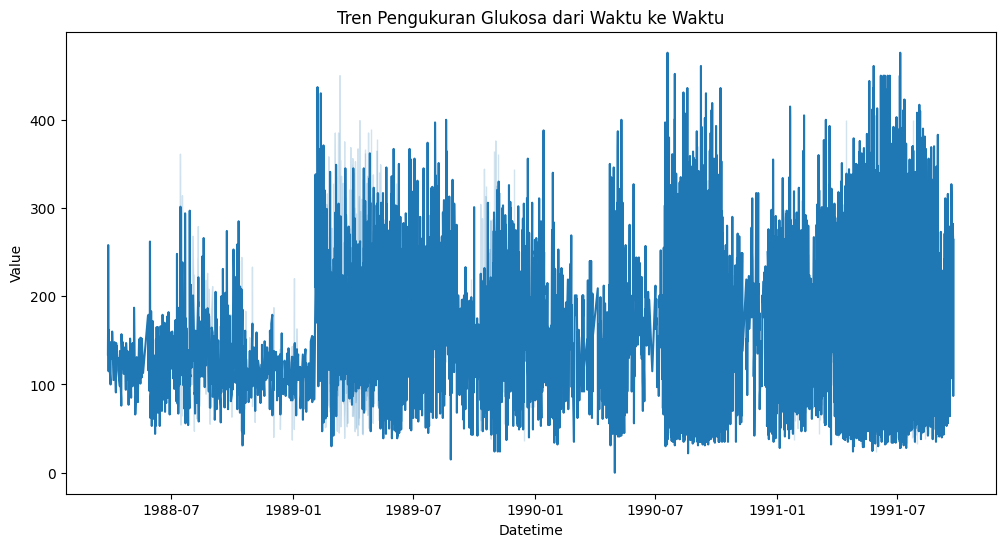

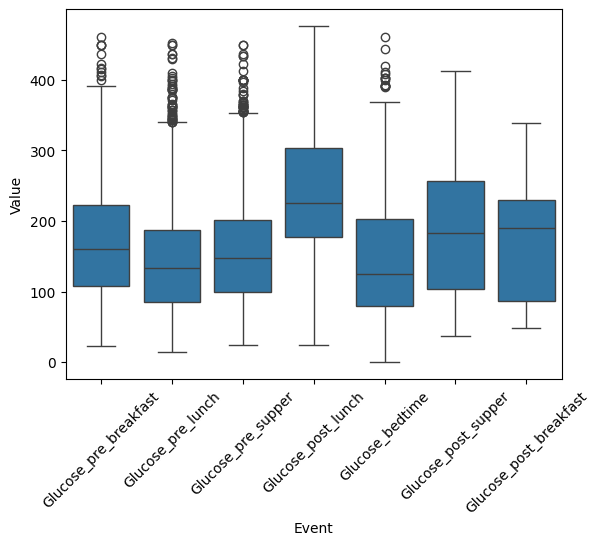

In [ ]:
# Eksplorasi Data (EDA)
plt.figure(figsize=(12,6))
sns.lineplot(x='Datetime', y='Value', data=glucose_df)
plt.title('Tren Pengukuran Glukosa dari Waktu ke Waktu')
plt.show()

sns.boxplot(x='Event', y='Value', data=glucose_df)
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Normalisasi (Scaling)
scaler = MinMaxScaler()
glucose_df['Scaled_Value'] = scaler.fit_transform(glucose_df[['Value']])
glucose_df.head()

,Code,Value,Datetime,Event,Scaled_Value
28245,58,134.0,1988-03-27 08:00:00,Glucose_pre_breakfast,0.281513
28247,60,158.0,1988-03-27 12:00:00,Glucose_pre_lunch,0.331933
28248,62,258.0,1988-03-27 18:00:00,Glucose_pre_supper,0.542017
28249,58,115.0,1988-03-28 08:00:00,Glucose_pre_breakfast,0.241597
28251,60,162.0,1988-03-28 12:00:00,Glucose_pre_lunch,0.340336


In [ ]:
from google.colab import files
files.download("diabetes_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Hasil Akhir :**
*   Kolom waktu (Datetime)
*   Jenis kejadian (Event)
*   Nilai (Value)
*   Sudah bersih, terurut, dan siap untuk analisis lanjut








